Example 1 : 
minimize = sin(x) sin(y)

In [1]:
import numpy as np
from scipy.optimize import minimize

In [10]:
def func(xy):
    x, y = xy
    return np.sin(x)*np.sin(y)

minimize(func, (0.1,-0.1))

      fun: -0.9999999999982316
 hess_inv: array([[ 1.00047155e+00, -4.71428602e-04],
       [-4.71428602e-04,  1.00047131e+00]])
      jac: array([-1.33365393e-06,  1.32620335e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 3
     njev: 9
   status: 0
  success: True
        x: array([ 1.57079498, -1.57079501])

In [12]:
minimize?

In [13]:
results = minimize(func, (0.1,-0.1), method = 'Powell')
results

   direc: array([[1., 0.],
       [0., 1.]])
     fun: -1.0
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 2
  status: 0
 success: True
       x: array([ 1.57079633, -1.57079633])

Example 2 linear programming

minimize : Z =3x + 5y (objective funtion)

subject to the contraints:

2x+3y >= 12

-x+y <= 3

x >= 4

y <= 3

x,y >= 0 (non-negativity contraints)

In [14]:
pip install pulp

     |████████████████████████████████| 40.6MB 107kB/s 


In [15]:
#determine pulp version
!pip show pulp

Name: PuLP
Version: 2.4
Summary: PuLP is an LP modeler written in python. PuLP can generate MPS or LP files and call GLPK, COIN CLP/CBC, CPLEX, and GUROBI to solve linear problems.
Home-page: https://github.com/coin-or/pulp
Author: J.S. Roy and S.A. Mitchell
Author-email: pulp@stuartmitchell.com
License: UNKNOWN
Location: /usr/local/lib/python3.7/dist-packages
Requires: amply
Required-by: 


In [32]:
import pulp as p

#create a LP minimization problem
lp_prob = p.LpProblem('Problem', p.LpMinimize)

#create non negativity contraint
x = p.LpVariable("x", lowBound = 0)
y = p.LpVariable("y", lowBound = 0)

#objective function
lp_prob += 3*x + 5*y

#contraints
lp_prob += 2*x + 3*y >= 12
lp_prob += -x + y <= 3
lp_prob += x >= 4
lp_prob += y <= 3

#display the problem
print (lp_prob)

status = lp_prob.solve() #solver
print(p.LpStatus[status]) #soluiton status

#print final solution
print(p.value(x),p.value(y),p.value(lp_prob.objective))


Problem:
MINIMIZE
3*x + 5*y + 0
SUBJECT TO
_C1: 2 x + 3 y >= 12

_C2: - x + y <= 3

_C3: x >= 4

_C4: y <= 3

VARIABLES
x Continuous
y Continuous

Optimal
6.0 0.0 18.0


Text(0, 0.5, '$y$')

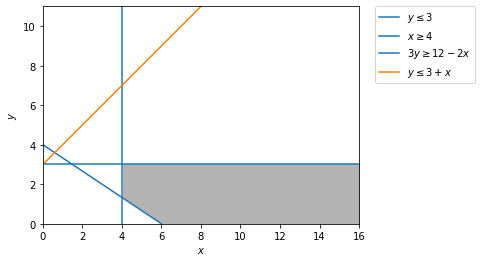

In [31]:
import matplotlib.pyplot as plt
#%matplotlib inlne -> for jupyter notebook only

#feasible region
d = np.linspace(-2,20,500)
x,y = np.meshgrid(d,d)
plt.imshow( ((y<=3) & (3*y>= -2*x +12) & (y<= x+3) & (x>= 4)).astype(int) ,
          extent = (x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha =0.3);

#contruct lines 
x = np.linspace(0,20,100)

#2x + 3y >= 12
y1 = (12 -2*x) / 3

#-x+y <= 3
y2 = 3 + x
#'$y\leq3$' '$x\geq4$'
#make plot
plt.axhline(y =3,xmin =0,xmax =20, label = r'$y\leq3$') #horizontal line (y<=3)
plt.axvline(x =4,ymin =0,ymax =20, label = r'$x\geq4$') #vertical line (x>= 4)
plt.plot(x,y1, label=r'$3y\geq12-2x$') #leq = lessequal
plt.plot(x,y2, label=r'$y\leq3+x$')   #geq = greatequal
plt.legend(bbox_to_anchor=(1.05,1),loc =2, borderaxespad=0.)

plt.xlim((0,16))
plt.ylim((0,11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
